<a href="https://colab.research.google.com/github/NadezhdaMalysheva/projects/blob/main/Memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Проверка размера модели в ОП

In [ ]:
!pip install memory_profiler

In [ ]:
!pip install pytorch_tabnet

In [ ]:
!python -m memory_profiler '/content/drive/MyDrive/Научная работа/Data/hyper/X-r/gb.py' '/gb10.pkl' '/tn10.pkl'

Filename: /content/drive/MyDrive/Научная работа/Data/hyper/X-r/gb.py

Line #    Mem usage    Increment  Occurences   Line Contents
     7    255.5 MiB    255.5 MiB           1   @profile
     8                                         def main_func(a, b):
     9                                             #tn = TabNetClassifier()
    10                                             #tn.load_model('/content/drive/MyDrive/Научная работа/Data/hyper/'+b)
    11                                             #gb = lgb.Booster(model_file='/content/drive/MyDrive/Научная работа/Data/hyper/'+a)
    12    259.7 MiB      4.2 MiB           1       gb = joblib.load('/content/drive/MyDrive/Научная работа/Data/hyper/'+a)
    13   2317.2 MiB   2057.4 MiB           1       tn = joblib.load('/content/drive/MyDrive/Научная работа/Data/hyper/'+b)




In [ ]:
!python -m memory_profiler '/content/drive/MyDrive/Научная работа/Data/hyper/X-r/gb.py' '/gb14.pkl' '/tn14.pkl'

Filename: /content/drive/MyDrive/Научная работа/Data/hyper/X-r/gb.py

Line #    Mem usage    Increment  Occurences   Line Contents
     7    257.5 MiB    257.5 MiB           1   @profile
     8                                         def main_func(a, b):
     9                                             #tn = TabNetClassifier()
    10                                             #tn.load_model('/content/drive/MyDrive/Научная работа/Data/hyper/'+b)
    11                                             #gb = lgb.Booster(model_file='/content/drive/MyDrive/Научная работа/Data/hyper/'+a)
    12    275.7 MiB     18.2 MiB           1       gb = joblib.load('/content/drive/MyDrive/Научная работа/Data/hyper/'+a)
    13   2314.7 MiB   2039.0 MiB           1       tn = joblib.load('/content/drive/MyDrive/Научная работа/Data/hyper/'+b)




In [ ]:
!python -m memory_profiler '/content/drive/MyDrive/Научная работа/Data/hyper/X-r/gb.py' '/gb20.pkl' '/tn20.pkl'

Filename: /content/drive/MyDrive/Научная работа/Data/hyper/X-r/gb.py

Line #    Mem usage    Increment  Occurences   Line Contents
     7    257.6 MiB    257.6 MiB           1   @profile
     8                                         def main_func(a, b):
     9                                             #tn = TabNetClassifier()
    10                                             #tn.load_model('/content/drive/MyDrive/Научная работа/Data/hyper/'+b)
    11                                             #gb = lgb.Booster(model_file='/content/drive/MyDrive/Научная работа/Data/hyper/'+a)
    12    303.3 MiB     45.7 MiB           1       gb = joblib.load('/content/drive/MyDrive/Научная работа/Data/hyper/'+a)
    13   2323.8 MiB   2020.5 MiB           1       tn = joblib.load('/content/drive/MyDrive/Научная работа/Data/hyper/'+b)




Размер модели TabNet не меняется в зависимости от объема побучающих данных, загрузка модели TabNet дает странные результаты при проверке на память (сильно меняется, но остается не меньше 2Gb)

In [ ]:
import joblib
import numpy as np

In [ ]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            25G        708M         21G        1.1M        3.4G         24G
Swap:            0B          0B          0B


In [ ]:
gb = joblib.load('/content/drive/MyDrive/Научная работа/Data/hyper/gb20.pkl')

In [ ]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            25G        772M         21G        1.0M        3.4G         24G
Swap:            0B          0B          0B


In [ ]:
tn = joblib.load('/content/drive/MyDrive/Научная работа/Data/hyper/tn20.pkl')

In [ ]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            25G        2.5G         19G         10M        3.4G         23G
Swap:            0B          0B          0B


Таким образом, по занимаемой памяти TabNet очень сильно проигрывает градиентному бустингу. Проверим, возможно он выйграет при времени предсказания за счет меньшего кол-ва весов. 

#Графики времени предсказания от размера обучающей выборки

In [ ]:
num = np.array(
    [[1, 6, 11,14], 
     [2, 7, 12,15],
     [4, 9, None,None],
     [3, 8, 13,None],
     [5, 10, None,None]]
)
num

array([[1, 6, 11, 14],
       [2, 7, 12, 15],
       [4, 9, None, None],
       [3, 8, 13, None],
       [5, 10, None, None]], dtype=object)

In [ ]:
for i in range(num.shape[0]):
  for j in range(num.shape[1]):
    if num[i, j] != None:
      tn = joblib.load('/content/drive/MyDrive/Научная работа/Data/hyper/tn'+str(num[i, j])+'.pkl')
      joblib.dump(tn, '/content/drive/MyDrive/Научная работа/Data/hyper/53/tn'+str(i)+str(j)+'.pkl')

In [ ]:
x = np.array([9000, 30000,	300000,	3000000])
times = np.array([[10.07989645, 16.53872514,	89.7821722, 143.1292372],
                [34.41679382, 14.51256013, 14.56602859, 12.36445093],
                [39.33082747,	15.69353652,	15.69255161, 12.84556222],
                [48.89288402,	18.30305004, None, None],
                [56.61739254,	20.06147051,	12.55536532, 15.24038434],
                [57.06839418,	20.14721894, None, None]]).astype('float')

acc = np.array([[0.886667,	0.8953,	0.902548,	0.9230419],
                [0.888889,	0.894067,	0.901943,	0.922444],
                [0.888889,	0.8925,	0.901833, 0.923124],
                [0.887333,	0.894133, None, None],
                [0.885667,	0.8913,	0.9023, 0.923039],
                [0.888111,	0.894433, None, None]]).astype('float')
     
lab = ['gb', 'tn-xs', 'tn-s', 'tn-m', 'tn-l', 'tn-xl']

In [ ]:
params = np.zeros(num.shape)
for i in range(num.shape[0]):
  for j in range(num.shape[1]):
    try:
      tn = joblib.load('/content/drive/MyDrive/Научная работа/Data/hyper/53/tn'+str(i)+str(j)+'.pkl')
      params[i, j] = sum([param.nelement() for param in tn.network.parameters()])
    except:
      pass
params

array([[  11488.,   11488.,   11488.,   11488.],
       [  32728.,   32728.,   32728.,   32728.],
       [ 144328.,  144328.,       0.,       0.],
       [ 497464.,  497464.,  497464.,       0.],
       [1845496., 1845496.,       0.,       0.]])

In [ ]:
for i in range(num.shape[0]):
  for j in range(num.shape[1]):
    try:
      tn = joblib.load('/content/drive/MyDrive/Научная работа/Data/hyper/53/tn'+str(i)+str(j)+'.pkl')
      t = time()
      pred = tn.predict(X_test)
      t = time() - t
      print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
      print('Testing Score: ', accuracy_score(y_test, pred))
      times[i+1, j] = t
    except:
      pass
times

In [ ]:
import matplotlib.pyplot as plt

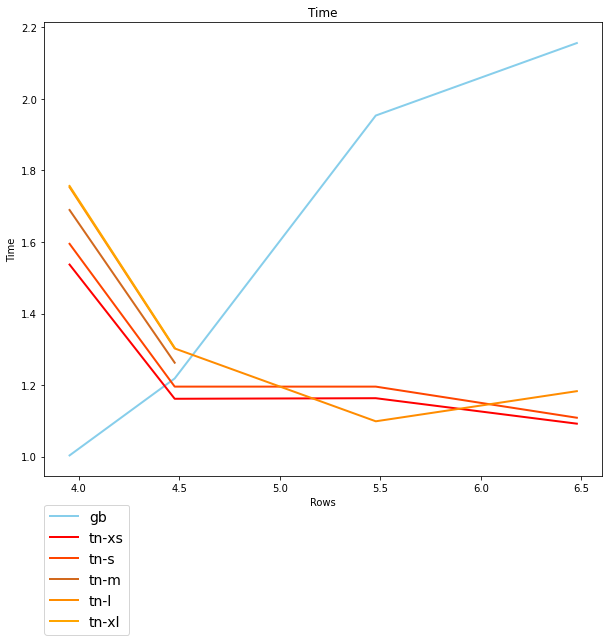

In [ ]:
    plt.figure(figsize=(10, 10))
    lines = []
    labels = []
    clr = ['skyblue', 'red', 'orangered', 'chocolate', 'darkorange', 'orange', 'gold', 'yellow', 'greenyellow', 'lime', 'springgreen', 'aquamarine', 'aqua',  'lightskyblue']
    for j in range(len(lab)):
      l, = plt.plot(np.log10(x), np.log10(times[j]), color=clr[j], lw=2)
      lines.append(l)
      labels.append(lab[j])


    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)

    plt.xlabel('Rows')
    plt.ylabel('Time')
    plt.title('Time')
    plt.legend(lines, labels, loc=(0, -0.35), prop=dict(size=14))
    plt.show()

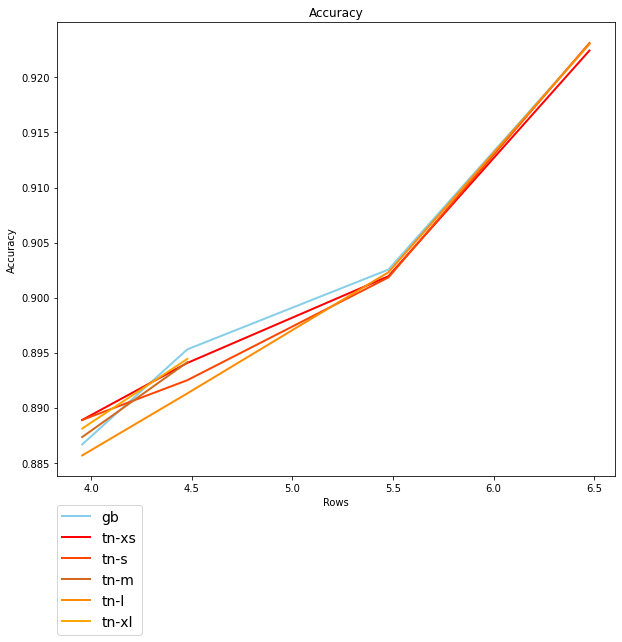

In [ ]:
    plt.figure(figsize=(10, 10))
    lines = []
    labels = []
    clr = ['skyblue', 'red', 'orangered', 'chocolate', 'darkorange', 'orange', 'gold', 'yellow', 'greenyellow', 'lime', 'springgreen', 'aquamarine', 'aqua',  'lightskyblue']
    for j in range(len(lab)):
      l, = plt.plot(np.log10(x), acc[j], color=clr[j], lw=2)
      lines.append(l)
      labels.append(lab[j])


    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    #plt.xlim((0, 3000000))
    #plt.ylim((0.88, 0.93))

    plt.xlabel('Rows')
    plt.ylabel('Accuracy')
    plt.title('Accuracy') 
    plt.legend(lines, labels, loc=(0, -0.35), prop=dict(size=14))
    plt.show()

In [ ]:
plt.figure()
plt.plot(x, ygb, color='darkorange', lw=2)
plt.plot(x, y1, color='red', lw=2)
plt.xlabel('Rows')
plt.ylabel('Acc')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
def data_preparation(X, y, c=10000, test_size = 0.8):

    X1_train, X1_test, y1_train, y1_test = train_test_split(X[y==1], y[y==1], test_size=test_size, random_state = 43)
    X2_train, X2_test, y2_train, y2_test = train_test_split(X[y==2], y[y==2], test_size=test_size, random_state = 43)
    X3_train, X3_test, y3_train, y3_test = train_test_split(X[y==3], y[y==3], test_size=test_size, random_state = 43)
    
    count = c
    count1 = c

    X_train, X_test = np.concatenate((X1_train[:count], X2_train[:count], X3_train[:count])), np.concatenate((X1_test[:count1], X2_test[:count1], X3_test[:count1]))
    y_train, y_test = np.concatenate((y1_train[:count], y2_train[:count], y3_train[:count])), np.concatenate((y1_test[:count1], y2_test[:count1], y3_test[:count1]))
    

    return [X_train, X_test, y_train, y_test]

In [ ]:
X, y  = joblib.load('/content/drive/MyDrive/Научная работа/Спецсем/TabNetModel/X_y.pkl')

In [ ]:
Rows = 3000000 # как в самой большой модели

In [ ]:
from time import time
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
  data_split = data_preparation(X, y, Rows//3, 0.5)

  X_train, X_test = data_split[:2]
  y_train, y_test = data_split[2:]

  train = np.concatenate((X_train, y_train.reshape((len(y_train), 1))), axis=1)
  np.random.shuffle(train)
  X_train, y_train = train[:,:-1], train[:,-1].astype('int')

  count = Rows//3

  #X_train_pred = np.concatenate((X1_test[2*count : 4*count], X2_test[2*count : 4*count], X3_test[2*count : 4*count])) ###############
  #X_val_pred   = np.concatenate((X1_test[count : 2*count], X2_test[count : 2*count], X3_test[count : 2*count]))
  #np.random.shuffle(X_train_pred)
  #np.random.shuffle(X_val_pred)

  robust = RobustScaler()

  X_train_norm = robust.fit_transform(X_train)
  X_test_norm = robust.transform(X_test)

In [ ]:
for i in [9000, 30000, 300000]:
  print(i)
  gb = joblib.load('/content/drive/MyDrive/Научная работа/Data/hyper/gb'+str(i)+'.pkl')
  t = time()
  pred = gb.predict(X_test_norm)
  print(time() - t)
  print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
  print('Testing Score: ', accuracy_score(y_test, pred))

9000
15.800808906555176
Confusion Matrix: 
 [[460777   7405  12000]
 [ 82732 828885  88383]
 [203541  19840 209206]]
Testing Score:  0.7836116122751885
30000
16.935672998428345
Confusion Matrix: 
 [[452360   7396  20426]
 [ 87846 812197  99957]
 [133259  19269 280059]]
Testing Score:  0.8075287711166377
300000
49.767234086990356
Confusion Matrix: 
 [[463182   6810  10190]
 [ 89076 821429  89495]
 [144561  19138 268888]]
Testing Score:  0.812172823796287


In [ ]:
tn = joblib.load('/content/drive/MyDrive/Научная работа/Data/hyper/tn20.pkl')
gb = joblib.load('/content/drive/MyDrive/Научная работа/Data/hyper/gb14.pkl')


In [ ]:
gb.weight_column 

In [ ]:
sum([param.nelement() for param in tn.network.parameters()])

32728

In [ ]:
t = time()
pred = tn.predict(X_test)
print(time() - t)
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print('Testing Score: ', accuracy_score(y_test, pred))

In [ ]:
tn

TabNetClassifier(n_d=8, n_a=8, n_steps=3, gamma=1.5, cat_idxs=[], cat_dims=[], cat_emb_dim=1, n_independent=2, n_shared=1, epsilon=1e-15, momentum=0.7, lambda_sparse=0.001, seed=0, clip_value=1, verbose=1, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.02}, scheduler_fn=<class 'torch.optim.lr_scheduler.StepLR'>, scheduler_params={'step_size': 200, 'gamma': 0.95}, mask_type='entmax', input_dim=100, output_dim=3, device_name='auto')

In [ ]:
t = time()
pred = gb.predict(X_test_norm)
print(time() - t)
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print('Testing Score: ', accuracy_score(y_test, pred))

143.1292371749878
Confusion Matrix: 
 [[427832  13220  39130]
 [  9908 970099  19993]
 [ 33320  32567 366700]]
Testing Score:  0.9225531154049443


In [ ]:
X_train.shape, X_test.shape

((1912767, 100), (1912769, 100))

In [ ]:
gb_s = joblib.load('/content/drive/MyDrive/Научная работа/Data/hyper/gb5.pkl')

In [ ]:
t = time()
pred = gb_s.predict(X_test_norm)
print(time() - t)
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print('Testing Score: ', accuracy_score(y_test, pred))

13.61814022064209
Confusion Matrix: 
 [[461421   6799  11962]
 [ 80776 812678 106546]
 [170945  18370 243272]]
Testing Score:  0.7932850229170381


# Подбор параметров для градиентного бустинга в зависимости от размера обучающей выборки

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls

%matplotlib inline

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score 
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import joblib
from tqdm.notebook import tqdm

from pytorch_tabnet.tab_model import TabNetClassifier

from hyperopt import hp
import numpy as np
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier

import lightgbm as lgb
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials

from time import time

In [ ]:
import torch

In [ ]:
def scor(y_test, y_pred):
  return accuracy_score(y_test, y_pred)

lgb_reg_params = {
    'min_child_samples':hp.randint('min_child_samples', 50)+1,
    'colsample_bytree': hp.uniform('colsample_bytree', 0.1, 0.9),
    'num_leaves' :      hp.randint('num_leaves', 100)+10,
    'min_child_weight': hp.uniform('min_child_weight', 0.001, 0.99),
    'n_estimators':     1000
}
lgb_fit_params = {
    'early_stopping_rounds': 20,
    'verbose': False
}
lgb_para = dict()
lgb_para['reg_params'] = lgb_reg_params
lgb_para['fit_params'] = lgb_fit_params
lgb_para['score'] = lambda y, pred: -accuracy_score(y, pred)


rf_reg_params = {
    'min_samples_leaf': hp.randint('min_samples_leaf', 20)+1,
    'min_samples_split':hp.uniform('min_samples_split', 0.001, 0.1),
    #'max_features':     hp.choice('max_features', ['auto', 'sqrt', 'log2', None]),
    #'learning_rate':    hp.uniform('learning_rate', 0.001, 0.1),
    'n_estimators':     hp.randint('n_estimators', 800)+100
}
rf_fit_params = {
}
rf_para = dict()
rf_para['reg_params'] = rf_reg_params
rf_para['fit_params'] = rf_fit_params
rf_para['score'] = lambda y, pred: -accuracy_score(y, pred)

tabnet_reg_params = {
    'n_d' :              64,
    'n_a' :              64,
    'n_steps' :          hp.randint('n_steps', 10-3)+3,
    'gamma' :            hp.uniform('gamma', 1.0, 3.0),
    'lambda_sparse' :    hp.uniform('lambda_sparse', 0.0, 0.01),
    'momentum' :         0.3, 
    'clip_value' :       2.,
    'optimizer_params' : dict(lr=2e-2),
    'scheduler_params' : {"step_size":50, "gamma":0.9},
    'scheduler_fn' :     torch.optim.lr_scheduler.StepLR,
    'mask_type' :       'entmax'
}

tabnet_fit_params = {
    'max_epochs' : 100, 
    'patience' : 15,
    'batch_size' : 512,
    'virtual_batch_size' : 128,
    'num_workers' : 0,
    'weights' : 1,
    'drop_last' : False,
    #'from_unsupervised' : unsupervised_model
}
tabnet_para = dict()
tabnet_para['reg_params'] = tabnet_reg_params
tabnet_para['fit_params'] = tabnet_fit_params
tabnet_para['score'] = lambda y, pred: -accuracy_score(y, pred)

In [ ]:
class HPOpt(object):

    def __init__(self, x_train, x_test, y_train, y_test, cv=True):
        self.x_train = x_train
        self.x_test  = x_test
        self.y_train = y_train
        self.y_test  = y_test
        self.X = np.concatenate((x_train, x_test))
        self.y = np.concatenate((y_train, y_test))
        self.cv = cv

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        try:
            result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
        except Exception as e:
            print({'status': STATUS_FAIL,
                    'exception': str(e)})
            return {'status': STATUS_FAIL,
                    'exception': str(e)}
        return result, trials

    def rf_reg(self, para):
        reg = RandomForestClassifier(**para['reg_params'])
        return self.train_reg(reg, para)

    def lgb_reg(self, para):
        reg = lgb.LGBMClassifier(**para['reg_params'])
        if self.cv:
          return self.train_cv(reg, para)
        return self.train_reg(reg, para)

    def tabnet_reg(self, para):
        reg = TabNetClassifier(**para['reg_params'])
        return self.train_cv(reg, para)


    def train_reg(self, reg, para):
        if len(para['fit_params'])>0:
            reg.fit(self.x_train, self.y_train,
                  eval_set=[(self.x_train, self.y_train), (self.x_test, self.y_test)],
                  **para['fit_params'])
        else:
            reg.fit(self.x_train, self.y_train)
        pred = reg.predict(self.x_test)
        loss = para['score'](self.y_test, pred)
        return {'loss': loss, 'status': STATUS_OK}

    def train_cv(self, reg, para):
        kf = KFold(n_splits=2, shuffle=False)
        loss = 0 
        for train, test in kf.split(self.X):
            if len(para['fit_params'])>0:
                reg.fit(self.X[train], self.y[train],
                      eval_set=[(self.X[train], self.y[train]), (self.X[test], self.y[test])],
                      **para['fit_params'])
            else:
                reg.fit(self.X[train], self.y[train])
            pred = reg.predict(self.X[test])
            score = para['score'](self.y[test], pred)
            loss += score

        loss=loss/2
        return {'loss': loss, 'status': STATUS_OK}


# 9000 rows

In [ ]:
Rows = 9000 # как в самой большой модели

In [ ]:
  data_split = data_preparation(X, y, Rows//3, 0.5)

  X_train, X_test = data_split[:2]
  y_train, y_test = data_split[2:4]

  train = np.concatenate((X_train, y_train.reshape((len(y_train), 1))), axis=1)
  np.random.shuffle(train)
  X_train, y_train = train[:,:-1], train[:,-1].astype('int')

  count = Rows//3

  #X_train_pred = np.concatenate((X1_test[2*count : 4*count], X2_test[2*count : 4*count], X3_test[2*count : 4*count])) ###############
  #X_val_pred   = np.concatenate((X1_test[count : 2*count], X2_test[count : 2*count], X3_test[count : 2*count]))
  #np.random.shuffle(X_train_pred)
  #np.random.shuffle(X_val_pred)

  robust = RobustScaler()

  X_train_norm = robust.fit_transform(X_train)
  X_test_norm = robust.transform(X_test)

In [ ]:
obj = HPOpt(X_train_norm, X_test_norm, y_train, y_test)

In [ ]:
lgb_opt = obj.process(fn_name='lgb_reg', space=lgb_para, trials=Trials(), algo=tpe.suggest, max_evals=10)

-0.8848888888888888
-0.8847777777777778
-0.8846666666666667
-0.8843333333333333
-0.8827777777777778
-0.8853333333333333
-0.8864444444444445
-0.8868888888888888
-0.8847777777777778
-0.8873333333333333
-0.8843333333333333
-0.8872222222222222
-0.8846666666666667
-0.8883333333333333
-0.885
-0.8864444444444445
-0.8851111111111111
-0.8874444444444445
-0.8823333333333333
-0.8864444444444445
100%|██████████| 10/10 [00:59<00:00,  5.99s/it, best loss: -0.8866666666666667]


In [ ]:
lgb_opt

({'colsample_bytree': 0.8111052939695854,
  'min_child_samples': 24,
  'min_child_weight': 0.7296110143210626,
  'num_leaves': 79},
 <hyperopt.base.Trials at 0x7f13aaa09690>)

In [ ]:
gb = lgb.LGBMClassifier( 
                            **{'n_estimators': 1000,
                               'colsample_bytree': 0.8111052939695854,
                               'min_child_samples': 24+1,
                               'min_child_weight': 0.7296110143210626,
                               'num_leaves': 79+10} 
                         )
gb.fit(X_train_norm, y_train, eval_set=[(X_train_norm, y_train), (X_test_norm, y_test)],  **lgb_fit_params)
joblib.dump(gb, '/content/drive/MyDrive/Научная работа/Data/hyper/gb9000.pkl')


['/content/drive/MyDrive/Научная работа/Data/hyper/gb9000.pkl']

In [ ]:
*9

# 30000 rows

In [ ]:
Rows = 30000 # как в самой большой модели

In [ ]:
  data_split = data_preparation(X, y, Rows//3, 0.5)

  X_train, X_test = data_split[:2]
  y_train, y_test = data_split[2:4]

  train = np.concatenate((X_train, y_train.reshape((len(y_train), 1))), axis=1)
  np.random.shuffle(train)
  X_train, y_train = train[:,:-1], train[:,-1].astype('int')

  count = Rows//3

  #X_train_pred = np.concatenate((X1_test[2*count : 4*count], X2_test[2*count : 4*count], X3_test[2*count : 4*count])) ###############
  #X_val_pred   = np.concatenate((X1_test[count : 2*count], X2_test[count : 2*count], X3_test[count : 2*count]))
  #np.random.shuffle(X_train_pred)
  #np.random.shuffle(X_val_pred)

  robust = RobustScaler()

  X_train_norm = robust.fit_transform(X_train)
  X_test_norm = robust.transform(X_test)

In [ ]:
obj = HPOpt(X_train_norm, X_test_norm, y_train, y_test)

In [ ]:
lgb_opt = obj.process(fn_name='lgb_reg', space=lgb_para, trials=Trials(), algo=tpe.suggest, max_evals=10)

In [ ]:
lgb_opt

In [ ]:
gb = lgb.LGBMClassifier( **{'n_estimators': 1000,
                            'colsample_bytree': 0.29243822352645577,
                            'min_child_samples': 47+1,
                            'min_child_weight': 0.7933718563538977,
                            'num_leaves': 46+10})

gb.fit(X_train_norm, y_train, eval_set=[(X_train_norm, y_train), (X_test_norm, y_test)],  **lgb_fit_params)
joblib.dump(gb, '/content/drive/MyDrive/Научная работа/Data/hyper/gb30000.pkl')

['/content/drive/MyDrive/Научная работа/Data/hyper/gb30000.pkl']

# 300000 rows

In [ ]:
Rows = 300000 # как в самой большой модели

In [ ]:
  data_split = data_preparation(X, y, Rows//3, 0.5)

  X_train, X_test = data_split[:2]
  y_train, y_test = data_split[2:4]

  train = np.concatenate((X_train, y_train.reshape((len(y_train), 1))), axis=1)
  np.random.shuffle(train)
  X_train, y_train = train[:,:-1], train[:,-1].astype('int')

  count = Rows//3

  #X_train_pred = np.concatenate((X1_test[2*count : 4*count], X2_test[2*count : 4*count], X3_test[2*count : 4*count])) ###############
  #X_val_pred   = np.concatenate((X1_test[count : 2*count], X2_test[count : 2*count], X3_test[count : 2*count]))
  #np.random.shuffle(X_train_pred)
  #np.random.shuffle(X_val_pred)

  robust = RobustScaler()

  X_train_norm = robust.fit_transform(X_train)
  X_test_norm = robust.transform(X_test)

In [ ]:
obj = HPOpt(X_train_norm, X_test_norm, y_train, y_test)

In [ ]:
lgb_opt = obj.process(fn_name='lgb_reg', space=lgb_para, trials=Trials(), algo=tpe.suggest, max_evals=10)

100%|██████████| 10/10 [1:04:02<00:00, 384.23s/it, best loss: -0.9025483333333333]


In [ ]:
lgb_opt

({'colsample_bytree': 0.47893421164334826,
  'min_child_samples': 18,
  'min_child_weight': 0.7047737397756423,
  'num_leaves': 97},
 <hyperopt.base.Trials at 0x7f096924f150>)

In [ ]:
gb = lgb.LGBMClassifier( **{'n_estimators': 1000,
                             'colsample_bytree': 0.47893421164334826,
                              'min_child_samples': 18+1,
                              'min_child_weight': 0.7047737397756423,
                              'num_leaves': 97+10})

gb.fit(X_train_norm, y_train, eval_set=[(X_train_norm, y_train), (X_test_norm, y_test)],  **lgb_fit_params)
joblib.dump(gb, '/content/drive/MyDrive/Научная работа/Data/hyper/gb300000.pkl')

['/content/drive/MyDrive/Научная работа/Data/hyper/gb300000.pkl']

# 3000000 rows

In [ ]:
Rows = 3000000 # как в самой большой модели

In [ ]:
  data_split = data_preparation(X, y, Rows//3, 0.5)

  X_train, X_test = data_split[:2]
  y_train, y_test = data_split[2:4]

  train = np.concatenate((X_train, y_train.reshape((len(y_train), 1))), axis=1)
  np.random.shuffle(train)
  X_train, y_train = train[:,:-1], train[:,-1].astype('int')

  count = Rows//3

  X1_train, X1_test = data_split[4:6]
  y1_train, y1_test = data_split[6:8]
  X2_train, X2_test = data_split[8:10] 
  y2_train, y2_test = data_split[10:12]
  X3_train, X3_test = data_split[12:14]
  y3_train, y3_test = data_split[14:16]

  #X_train_pred = np.concatenate((X1_test[2*count : 4*count], X2_test[2*count : 4*count], X3_test[2*count : 4*count])) ###############
  #X_val_pred   = np.concatenate((X1_test[count : 2*count], X2_test[count : 2*count], X3_test[count : 2*count]))
  #np.random.shuffle(X_train_pred)
  #np.random.shuffle(X_val_pred)

  robust = RobustScaler()

  X_train_norm = robust.fit_transform(X_train)
  X_test_norm = robust.transform(X_test)

In [ ]:
obj = HPOpt(X_train_norm, X_test_norm, y_train, y_test)

In [ ]:
lgb_opt = obj.process(fn_name='lgb_reg', space=lgb_para, trials=Trials(), algo=tpe.suggest, max_evals=10)

 60%|██████    | 6/10 [1:25:18<58:25, 876.43s/it, best loss: -0.9230157954253755]  

In [ ]:
lgb_opt

In [ ]:
 gb = lgb.LGBMClassifier( **{'n_estimators': 1000
                             'colsample_bytree': 0.47893421164334826,
                              'min_child_samples': 18+1,
                              'min_child_weight': 0.7047737397756423,
                              'num_leaves': 97+10})

  t = time()
  gb.fit(X_train_norm, y_train, eval_set=[(X_train_norm, y_train), (X_valid_norm, y_valid)],  **lgb_fit_params)
  t = time()-t
  joblib.dump(gb, '/content/drive/MyDrive/Научная работа/Data/hyper/gb3000000.pkl')

# Дополнительное, для меня

In [ ]:
X_train.shape

(9000, 100)

In [ ]:
joblib.dump(X_test, '/content/drive/MyDrive/Научная работа/Data/hyper/X_main_test.pkl')

['/content/drive/MyDrive/Научная работа/Data/hyper/X_main_test.pkl']

In [ ]:
joblib.dump(y_test, '/content/drive/MyDrive/Научная работа/Data/hyper/y_main_test.pkl')

['/content/drive/MyDrive/Научная работа/Data/hyper/y_main_test.pkl']